In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from MLCode.KCrossVal import kFoldCross
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL
import torch
from torch import nn
import itertools
from MLCode.SVM import load_results, save_results
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import time

In [16]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)

kernel='rbf'
C_list=[0.1,1,10,100,1000]
gamma_list=[0.0001,0.001,0.01,0.1,1]
epsilon_list=[0.001]
HP_list = itertools.product(gamma_list, C_list, epsilon_list)
results = []
for HyperParam in HP_list:
    gamma_s, C_s, epsilon_s = HyperParam

    SVR_model=SVR(kernel=kernel,gamma=gamma_s,C=C_s,epsilon=epsilon_s,cache_size=1200)
    mor=MultiOutputRegressor(SVR_model, n_jobs=2)

    res = kFoldCross(mor.fit, mor.predict, X_dev, Y_dev, 5)
    res = C_s, epsilon_s, gamma_s, res[0], res[1], res[2]
    results.append(res)

columns=['C', 'epsilon', 'gamma', 'MEE_mean', 'MEE_std', 'seconds']
df = pd.DataFrame(results, columns=columns)

# save results
save_results(df, kernel)
# load all saved results
df = load_results(kernel)

In [46]:
# load all saved results
df = load_results(kernel)
df.sort_values(by=['MEE_mean']).head()

C  epsilon  gamma  MEE_mean   MEE_std   seconds
17    10.0    0.001   0.10  2.958995  0.171739  0.121038
18   100.0    0.001   0.10  3.123882  0.167362  0.128947
16     1.0    0.001   0.10  3.206170  0.181968  0.119483
14  1000.0    0.001   0.01  3.233564  0.146512  0.123410
13   100.0    0.001   0.01  3.353219  0.122090  0.113116

Epsilon:
0.001


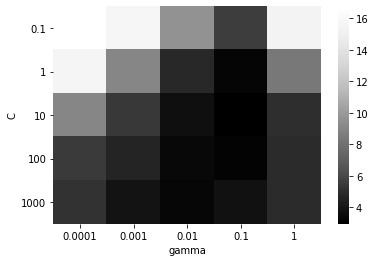

In [35]:
df2 = df
df2 = df2.sort_values(by=['C', 'gamma'])
array = df2['MEE_mean'].to_numpy()
array = array.reshape(-1, 5)
ax = sns.heatmap(array, xticklabels=gamma_list, yticklabels=C_list,cmap='Greys_r')
plt.yticks(rotation=0)
ax.set_xlabel('gamma')
ax.set_ylabel('C')

print('Epsilon:')
print(epsilon_list[0])

In [109]:
kernel='poly'
# C=1000 bad performance and takes too much time
C_list=[0.1,0.5,1,5]
epsilon_list = [0.01]
# epsilon_list=[0.001,0.1,10]
coeff_list=[0.5,1.0,1.5]
degree_list = [3,4,5]
HP_list = itertools.product(C_list, epsilon_list, degree_list, coeff_list)
results = []
for HyperParam in HP_list:
    C, epsilon, degree, coeff = HyperParam

    SVR_model=SVR(
        kernel='poly',degree=degree,coef0=coeff,C=C,epsilon=epsilon,cache_size=1200
    )
    mor=MultiOutputRegressor(SVR_model, n_jobs=2)

    start = time.time()
    res = kFoldCross(mor.fit, mor.predict, X_dev, Y_dev, 5)
    res = C, epsilon, degree, coeff, res[0], res[1], time.time()-start
    results.append(res)

columns=['C', 'epsilon', 'degree', 'coeff', 'MEE_mean', 'MEE_std', 'seconds']
df = pd.DataFrame(results, columns=columns)

# save results
save_results(df, kernel)


In [134]:
# load all saved results
df = load_results(kernel)
df.sort_values(by=['MEE_mean'])

C  epsilon  degree  coeff  MEE_mean   MEE_std   seconds
52  0.5     1.00       5    1.0  3.068993  0.137332  0.567762
53  0.5     1.00       5    1.5  3.072654  0.147021  0.845697
61  1.0     1.00       5    1.0  3.082913  0.142093  0.762224
58  1.0     1.00       4    1.0  3.087110  0.141075  0.519133
59  1.0     1.00       4    1.5  3.094794  0.143163  0.677192
..  ...      ...     ...    ...       ...       ...       ...
36  0.1     1.00       3    0.5  4.340061  0.130621  0.963546
14  0.1     0.01       4    0.5  4.635616  0.162282  0.489990
39  0.1     1.00       4    0.5  4.656652  0.146952  0.396238
16  0.1     0.01       5    0.5  4.690399  0.151578  0.511015
42  0.1     1.00       5    0.5  4.708551  0.137826  0.404701

[72 rows x 7 columns]

In [143]:
# load all saved results
df = load_results(kernel)
df = df.loc[df['epsilon'] == 0.01]

Epsilon:
1.0


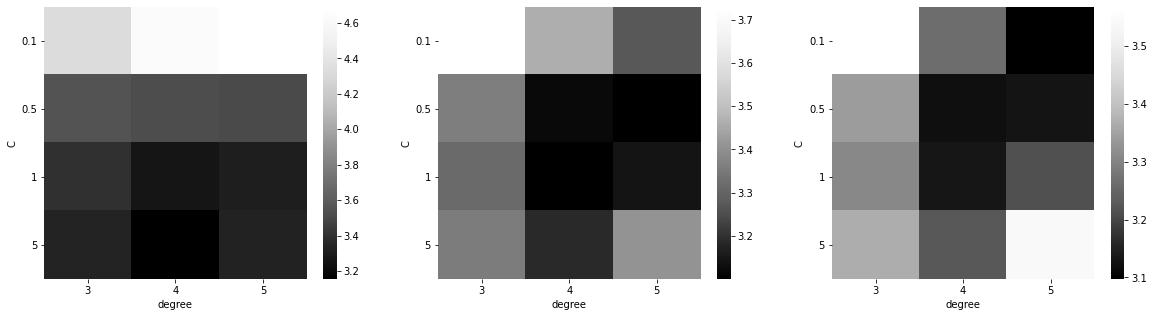

In [149]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

print('Epsilon:')
print(epsilon_list[0])

for i, coeff in enumerate(coeff_list):
    df2 = df.loc[df['coeff'] == coeff]
    df2 = df2.sort_values(by=['C', 'degree'])
    array = df2['MEE_mean'].to_numpy()
    array = array.reshape(-1, 3)

    sns.heatmap(array, xticklabels=degree_list, yticklabels=C_list,cmap='Greys_r', ax=axes[i])
    axes[i].tick_params(labelrotation=0)
    axes[i].set_xlabel('degree')
    axes[i].set_ylabel('C')

